## PL4 -   Ensemble Learning and Parameter Optimization

### 1.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2.

In [4]:
columns_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

df_M = df[df['diagnosis'] == 'M'][columns_mean]
df_B = df[df['diagnosis'] == 'B'][columns_mean]
df_means = df[columns_mean]
print('Malgino:', df_M.shape,"Benigno:",df_B.shape)

Malgino: (212, 10) Benigno: (357, 10)


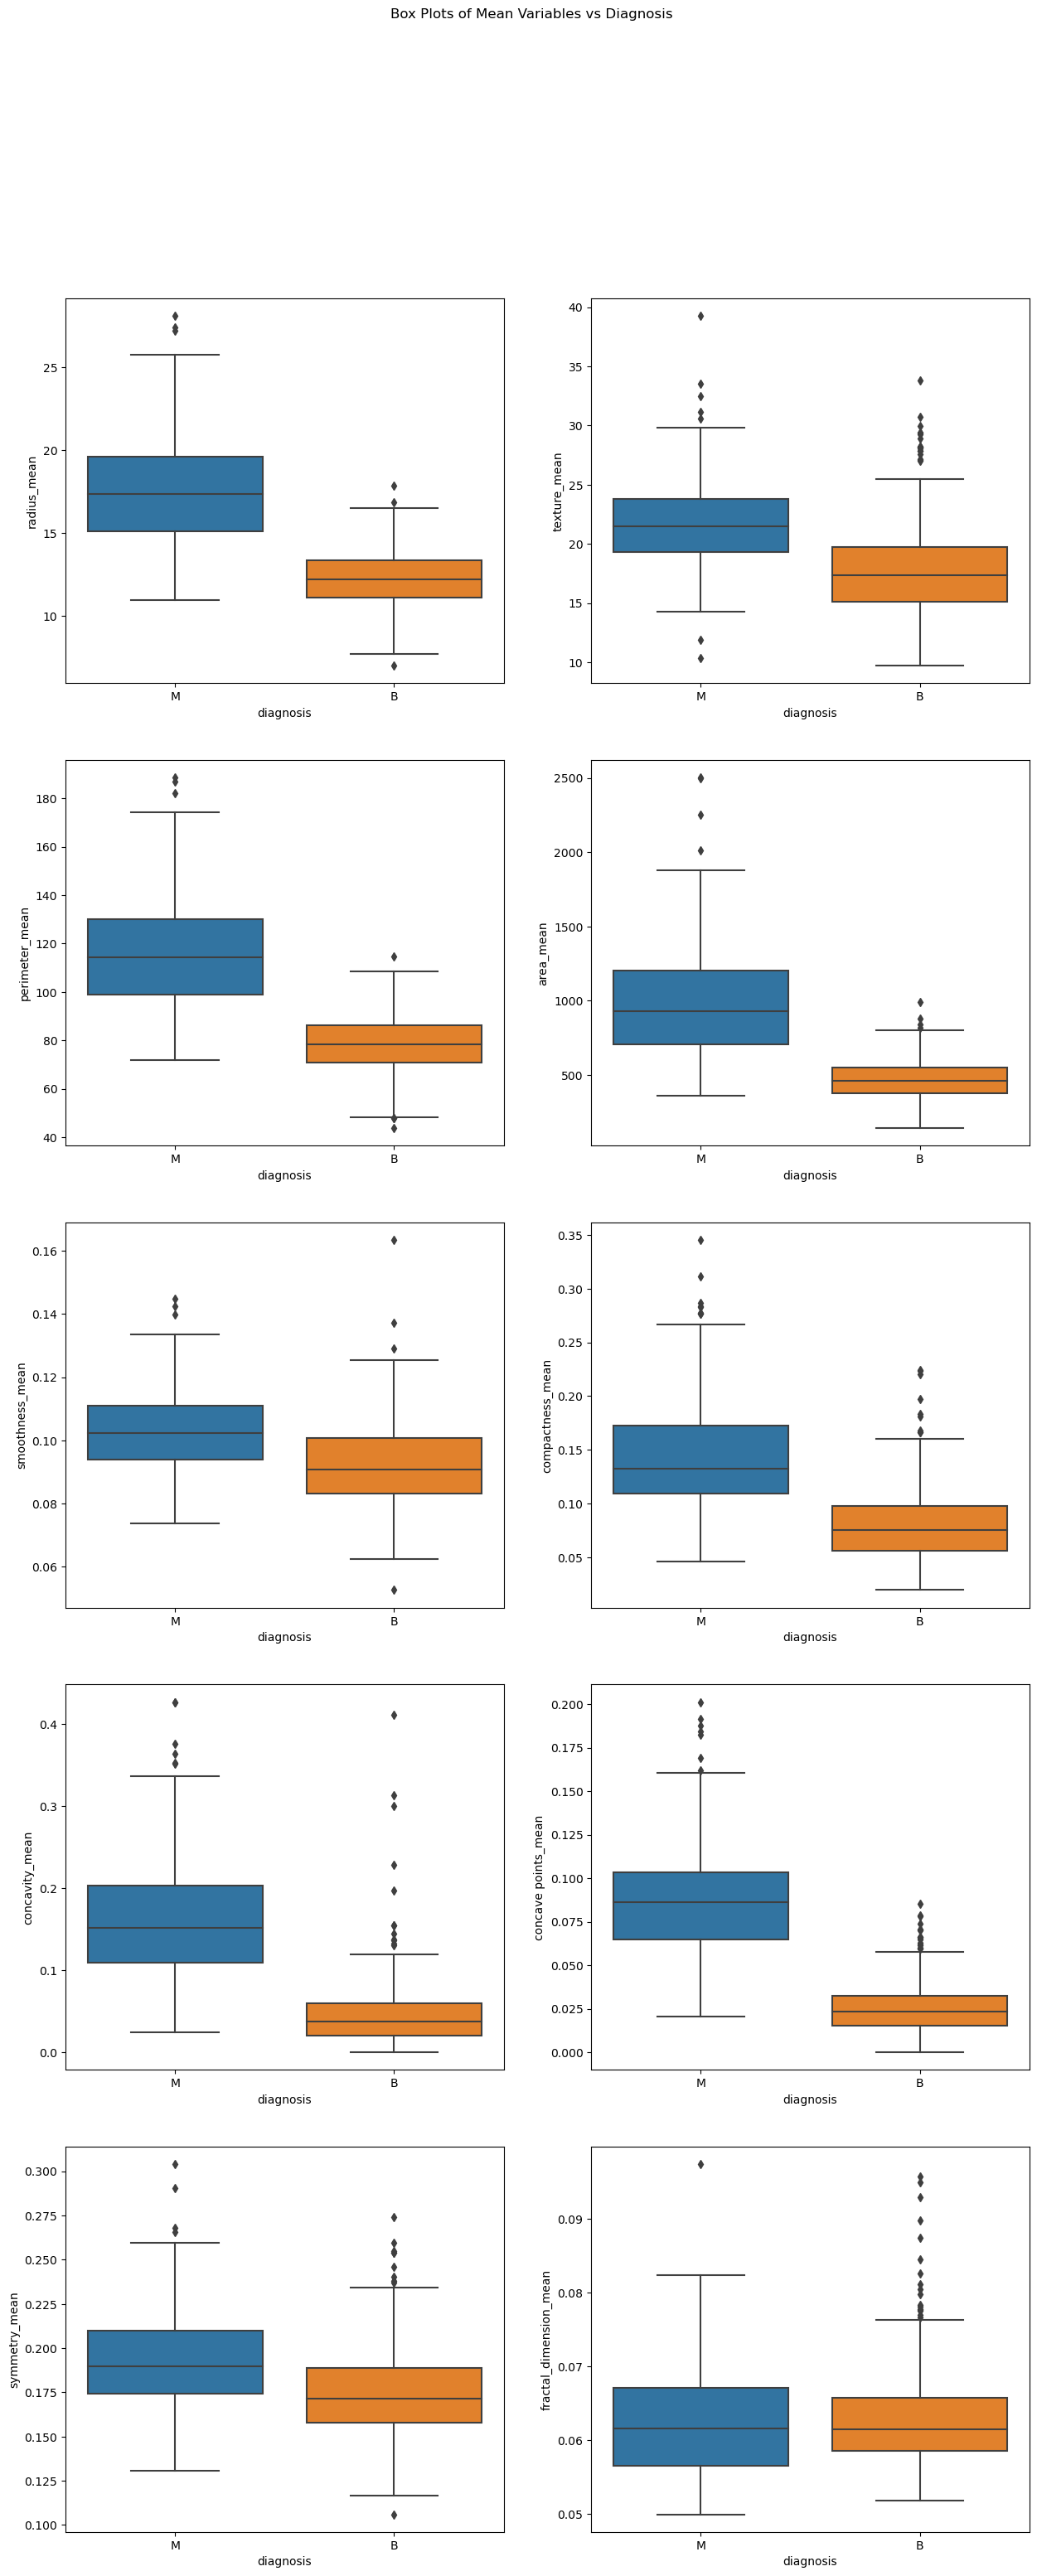

In [5]:
fig, axes = plt.subplots(5, 2, figsize=(15, 35))
fig.suptitle('Box Plots of Mean Variables vs Diagnosis')

x = 0
y = 0

for column in columns_mean:
    if y > 1:
        x = x+1
        y=0
    sns.boxplot(x='diagnosis',y=column,data=df , ax=axes[x,y])
    y = y+1



Através destes boxplots notamos que para o diagnóstico Maligno os valores das médias são mais elevados do que o diagnostico Benigno, com a excessão de uma média, a dimensão fractal, onde não se verifica uma grande diferença de valores.

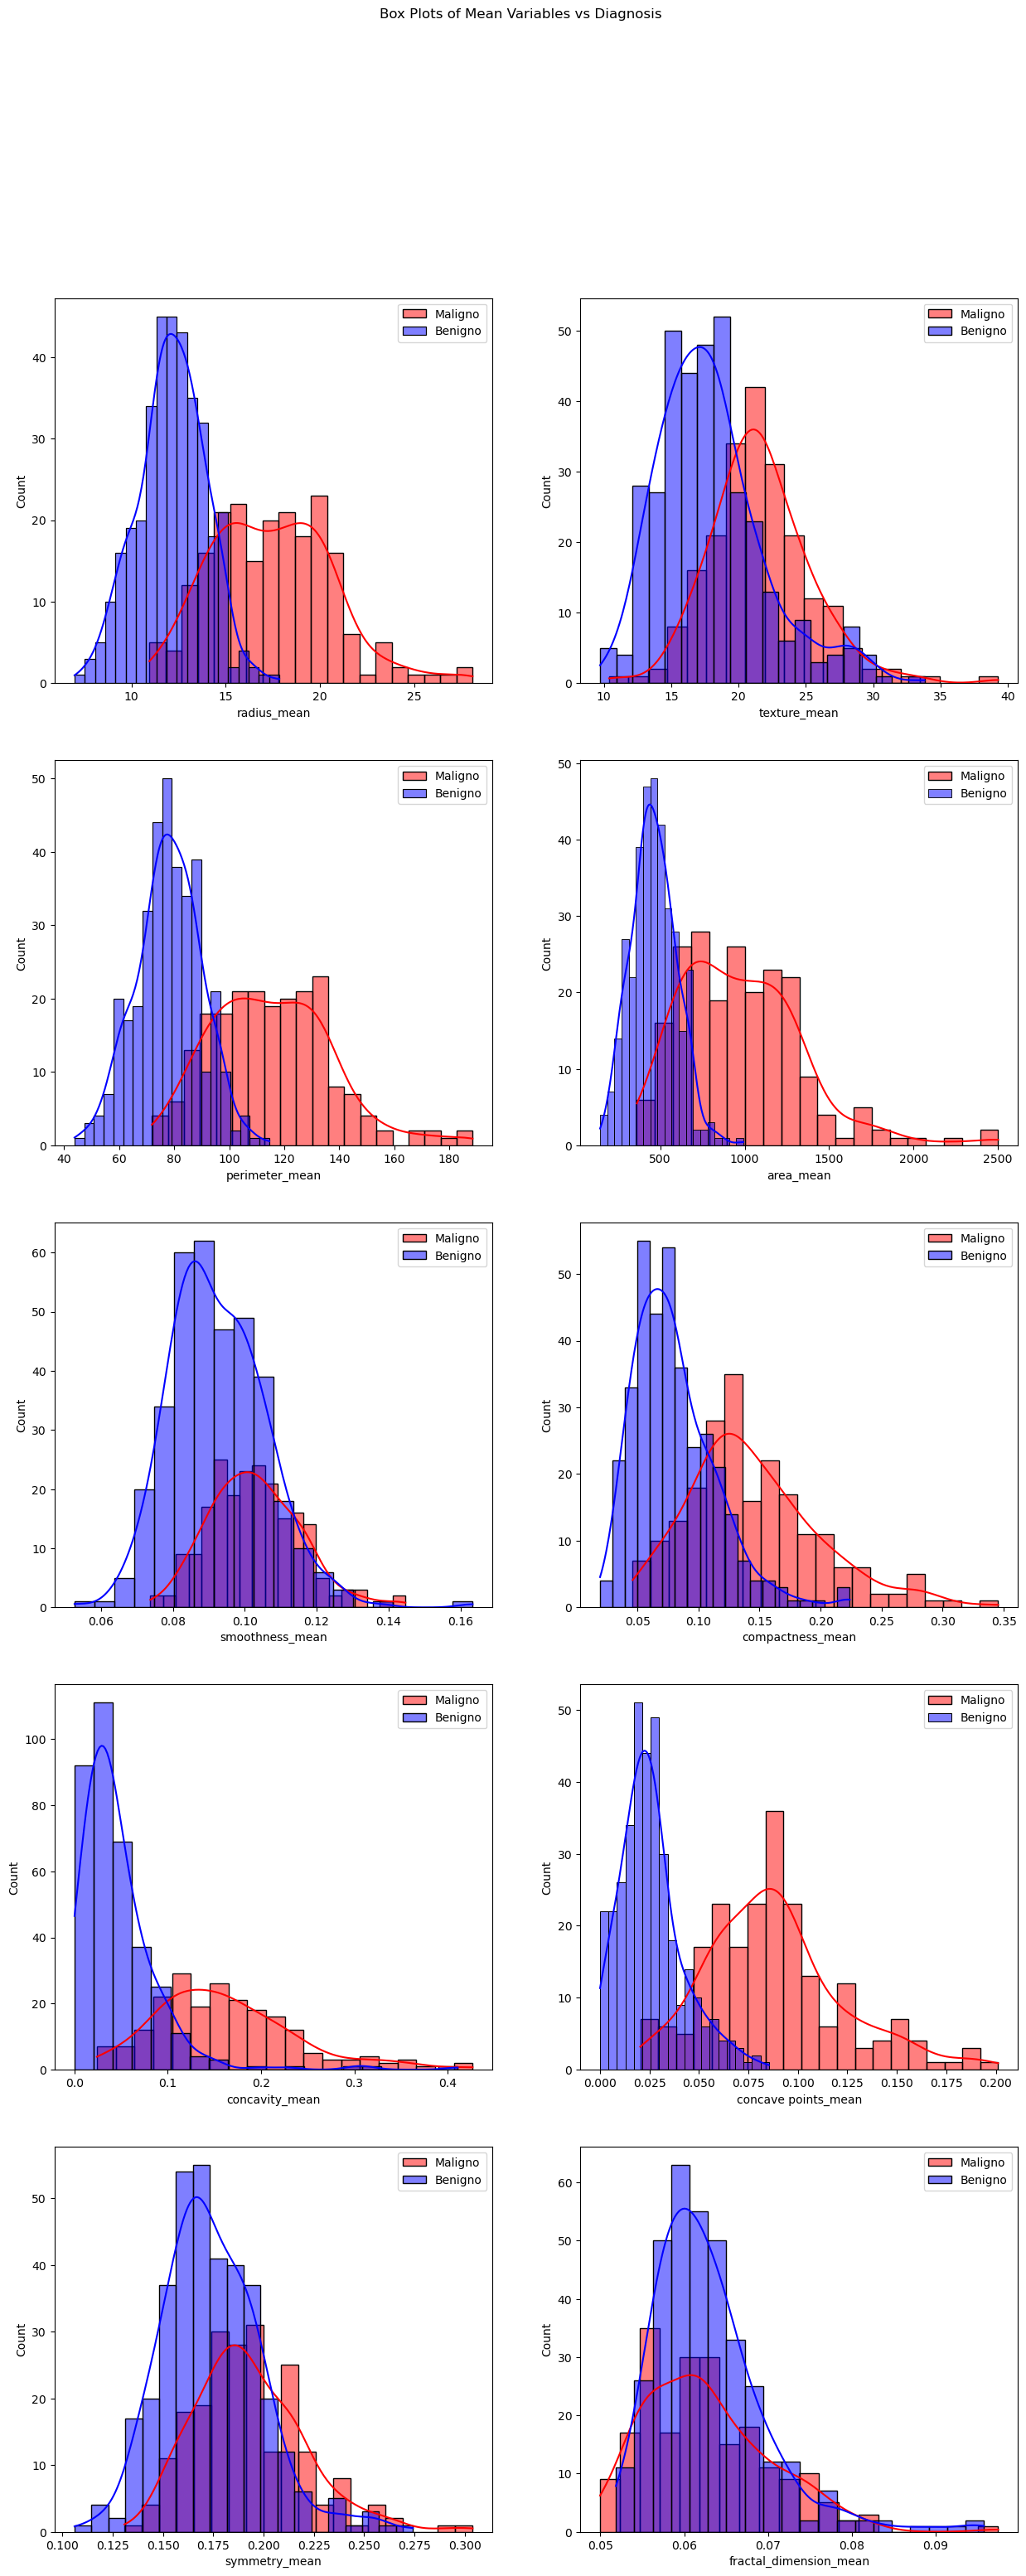

In [6]:
fig, axes = plt.subplots(5, 2, figsize=(15, 35))
fig.suptitle('Box Plots of Mean Variables vs Diagnosis')

x = 0
y = 0

for column in columns_mean:
    if y > 1:
        x = x+1
        y=0
    sns.histplot(x=column,data=df_M, color='red',kde=True, bins=20,ax=axes[x,y],label='Maligno')
    sns.histplot(x=column,data=df_B, color='blue',kde=True, bins=20,ax=axes[x,y],label='Benigno')
    axes[x, y].legend()
    y = y+1
plt.show()

### 3.

In [7]:
X = df
X = X.drop(columns=['id','diagnosis'])
y = df['diagnosis'].replace({'M':1, 'B':0})

#### 3.1. Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, recall_score, accuracy_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, train_test_split

In [9]:
gnb = GaussianNB()

recall_scorer = make_scorer(recall_score)
recalls = cross_val_score(gnb, X, y, cv=5, scoring=recall_scorer)
average_recall = np.mean(recalls)
std_dev_recall = np.std(recalls)

print(f"Average Recall: {average_recall:.2f}")
print(f"Standard Deviation of Recall: {std_dev_recall:.2f}")

Average Recall: 0.89
Standard Deviation of Recall: 0.04


#### 3.2 k-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)

# Criar função de pontuação
recall_scorer = make_scorer(recall_score)

# Validação Cruzada com cv=5
recalls = cross_val_score(knn, X, y, cv=5, scoring=recall_scorer)

# Calcula media dos valores da Validaçao Cruzada
avg_recall = np.mean(recalls)
std_dev_recall = np.std(recalls)

print(f"Average Recall: {avg_recall:.2f}")
print(f"Standard Deviation of Recall: {std_dev_recall:.2f}")

Average Recall: 0.87
Standard Deviation of Recall: 0.07


### 4.
#### Naive Bayes

In [32]:
# determinar o probabilidade de ser maligno
print("Maligno:",df_M.shape)
print("Benigno:",df_B.shape)
prob_M = df_M.shape[0]/ df.shape[0]
prob_B = 1 - prob_M

Maligno: (212, 10)
Benigno: (357, 10)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV

In [37]:
gnb = GaussianNB()
gnb.get_params().keys()


dict_keys(['priors', 'var_smoothing'])

In [42]:
param_gnb = {
    'priors': [
        {'M': prob_M, 'B': prob_B}
    ],
    'var_smoothing': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14,1e-13, 1e-12, 1e-11, 1e-10]
}

In [43]:
gnb_gs = GridSearchCV(gnb, param_gnb, cv=5)

gnb_gs_fit = gnb_gs.fit(X, y)
gnb_best = gnb_gs.best_estimator_

gnb_preds = cross_val_score(gnb_best, X, y, cv=5)

ValueError: 
All the 55 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ruimendonca/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ruimendonca/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ruimendonca/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py", line 263, in fit
    return self._partial_fit(
           ^^^^^^^^^^^^^^^^^^
  File "/Users/ruimendonca/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py", line 448, in _partial_fit
    if len(priors) != n_classes:
       ^^^^^^^^^^^
TypeError: len() of unsized object
